## Case Study by: Mohammed Saqlain Attar 

## Domain –Chemical Industry
## focus –Classify chemical
### Business challenge/requirement
## FuPont is a leading chemical company across the globe.  The Company is on a CSR (Corporate Social Responsibility) mission. It wants to identify biodegradable products based on a study of the relationships between chemical structure and biodegradation of molecules. You as ML expert have to create a ML model to classify the chemical structure as  'Ready BioDegradable' –RB vs 'Not Ready Biodegradable' –NRB
    Key issues - Data has lots of attributes and classification could be tricky
    Considerations-NONE
    Data volume-Approx 1055   records –file bio-degradabale-data.csv Fields in Data
    •Details in .ipynb notebook
    Additional information-NA
    Business benefitsResearch can lead FuPont to create truly unique Biodegradable packaging material. This could lead to massive profits in future


# Data Set : QSAR BioDegradation Data Set

The data have been used to develop QSAR (Quantitative Structure Activity Relationships) models for the study of the relationships between chemical structure and biodegradation of molecules. Biodegradation experimental values of 1055 chemicals were collected.

Data can be found on UCI Machine Learning Repository: 
https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation

Attribute Information:

1) SpMax_L: Leading eigenvalue from Laplace matrix <br>
2) J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity <br>
3) nHM: Number of heavy atoms <br>
4) F01[N-N]: Frequency of N-N at topological distance 1 <br>
5) F04[C-N]: Frequency of C-N at topological distance 4 <br>
6) NssssC: Number of atoms of type ssssC <br>
7) nCb-: Number of substituted benzene C(sp2) <br>
8) C%: Percentage of C atoms <br>
9) nCp: Number of terminal primary C(sp3) <br>
10) nO: Number of oxygen atoms <br>
11) F03[C-N]: Frequency of C-N at topological distance 3 <br>
12) SdssC: Sum of dssC E-states <br>
13) HyWi_B(m): Hyper-Wiener-like index (log function) from Burden matrix weighted by mass <br>
14) LOC: Lopping centric index <br>
15) SM6_L: Spectral moment of order 6 from Laplace matrix <br>
16) F03[C-O]: Frequency of C - O at topological distance 3 <br>
17) Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom) <br>
18) Mi: Mean first ionization potential (scaled on Carbon atom) <br>
19) nN-N: Number of N hydrazines <br>
20) nArNO2: Number of nitro groups (aromatic) <br>
21) nCRX3: Number of CRX3 <br>
22) SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability <br>
23) nCIR: Number of circuits <br>
24) B01[C-Br]: Presence/absence of C - Br at topological distance 1 <br>
25) B03[C-Cl]: Presence/absence of C - Cl at topological distance 3 <br>
26) N-073: Ar2NH / Ar3N / Ar2N-Al / R..N..R <br>
27) SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index) <br>
28) Psi_i_1d: Intrinsic state pseudoconnectivity index - type 1d <br>
29) B04[C-Br]: Presence/absence of C - Br at topological distance 4 <br>
30) SdO: Sum of dO E-states <br>
31) TI2_L: Second Mohar index from Laplace matrix <br>
32) nCrt: Number of ring tertiary C(sp3) <br>
33) C-026: R--CX--R <br>
34) F02[C-N]: Frequency of C - N at topological distance 2 <br>
35) nHDon: Number of donor atoms for H-bonds (N and O) <br>
36) SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass <br>
37) Psi_i_A: Intrinsic state pseudoconnectivity index - type S average <br>
38) nN: Number of Nitrogen atoms <br>
39) SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass <br>
40) nArCOOR: Number of esters (aromatic) <br>
41) nX: Number of halogen atoms <br>
42) experimental class: ready biodegradable (RB) and not ready biodegradable (NRB)<br>

In [8]:
import pandas as pd 
import numpy as np

In [9]:
names = ['SpMax_L', 'J_Dz', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-', 'C%','nCp','nO','F03[C-N]','SdssC','HyWi_B','LOC','SM6_L','F03[C-O]','Me','Mi','nN-N','nArNO2','nCRX3','SpPosA','nCIR','B01[C-Br]','B03[C-Cl]','N-073','SpMax_A','Psi_i_1d','B04[C-Br]','SdO','TI2_L','nCrt','C-026','F02[C-N]','nHDon','SpMax_B','Psi_i_A','nN','SM6_B','nArCOOR','nX','experimentalclass']
df = pd.read_csv('bio-degradabale-data.csv',sep=';',names=names)
df

,SpMax_L,J_Dz,nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,experimentalclass
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,NRB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SpMax_L            1055 non-null   float64
 1   J_Dz               1055 non-null   float64
 2   nHM                1055 non-null   int64  
 3   F01[N-N]           1055 non-null   int64  
 4   F04[C-N]           1055 non-null   int64  
 5   NssssC             1055 non-null   int64  
 6   nCb-               1055 non-null   int64  
 7   C%                 1055 non-null   float64
 8   nCp                1055 non-null   int64  
 9   nO                 1055 non-null   int64  
 10  F03[C-N]           1055 non-null   int64  
 11  SdssC              1055 non-null   float64
 12  HyWi_B             1055 non-null   float64
 13  LOC                1055 non-null   float64
 14  SM6_L              1055 non-null   float64
 15  F03[C-O]           1055 non-null   int64  
 16  Me                 1055 

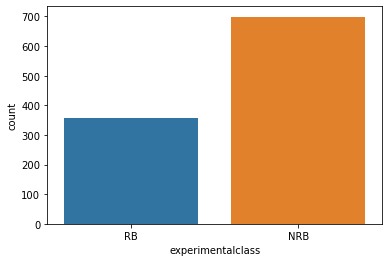

In [11]:
import seaborn as sns

sns.countplot(df['experimentalclass'])

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['experimentalclass'] = labelencoder.fit_transform(df['experimentalclass'])

In [13]:
df

,SpMax_L,J_Dz,nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,experimentalclass
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,0
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,0
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,0
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,0


### Input and Output Variables

In [18]:
X = df.loc[:,'SpMax_L':'nX']

In [19]:
y = df['experimentalclass']

### Scaling the data

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [21]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,SpMax_L,J_Dz,nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX
0,-1.579865,-0.455652,-0.490223,-0.166690,-0.420308,-0.270248,-0.740386,-0.618770,0.317793,-1.016454,...,-0.201720,-0.581289,-0.560901,-0.764983,-0.970085,-1.505801,-0.629667,-1.108824,-0.160545,-0.323123
1,-1.120710,-1.149466,-0.490223,-0.166690,-0.420308,-0.270248,-0.740386,-0.684415,-0.191738,-0.452944,...,-0.201720,-0.581289,-0.560901,-0.764983,-0.603766,-0.920550,-0.629667,-1.105602,-0.160545,-0.323123
2,-1.556084,0.218665,-0.490223,-0.166690,-0.420308,-0.270248,-0.740386,-1.132986,0.317793,1.237584,...,-0.201720,-0.581289,-0.560901,0.030931,-0.842975,-0.220118,-0.629667,-0.828495,-0.160545,-0.323123
3,-3.260993,-0.432906,-0.490223,-0.166690,-0.420308,-0.270248,-0.740386,-1.866017,-0.701269,0.110565,...,-0.201720,-0.581289,-0.560901,0.030931,-0.873001,3.800364,-0.629667,-1.562345,-0.160545,-0.323123
4,-0.999976,0.391006,-0.490223,-0.166690,-0.420308,-0.270248,-0.740386,-0.837585,0.317793,1.237584,...,-0.201720,-0.581289,-0.560901,-0.764983,-0.567735,-0.238796,-0.629667,-0.504667,-0.160545,-0.323123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1.186039,-0.209417,-0.490223,-0.166690,-0.420308,1.593229,-0.740386,-0.542185,1.336854,-0.452944,...,2.905066,-0.581289,2.078880,0.030931,-0.345541,-0.492508,0.287872,-0.436195,-0.160545,-0.323123
1051,0.922620,0.365492,-0.490223,-0.166690,3.439291,-0.270248,-0.740386,-0.192080,-0.701269,4.055132,...,-0.201720,-0.581289,0.758989,-0.764983,-0.131354,0.816522,2.122951,0.522402,-0.160545,-0.323123
1052,0.157972,-1.567560,-0.490223,3.741254,3.439291,-0.270248,1.508051,0.803529,-0.701269,1.237584,...,-0.201720,2.050728,5.158624,-0.764983,-0.070301,0.027368,3.958029,0.731037,2.976031,-0.323123
1053,0.686640,-1.658544,0.877992,-0.166690,15.018086,-0.270248,3.306800,2.083598,-0.701269,-1.016454,...,-0.201720,0.076715,6.478515,-0.764983,1.891409,-0.783577,6.710646,1.953853,-0.160545,0.123659


### Logistic Regression Model 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=10)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(x_test)

In [27]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [28]:
metrics.accuracy_score(y_test,y_pred)

0.8738170347003155

### Cross Validation

In [29]:
cross_val_score(model,X_scaled,y,cv=10,scoring='accuracy').mean()

0.8596675651392633

In [30]:
metrics.confusion_matrix(y_test,y_pred)

array([[194,  18],
       [ 22,  83]], dtype=int64)

In [31]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       212
           1       0.82      0.79      0.81       105

    accuracy                           0.87       317
   macro avg       0.86      0.85      0.86       317
weighted avg       0.87      0.87      0.87       317



## Ada Boost Classifier

In [35]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [36]:
def get_result_score(num_trees):
    model = AdaBoostClassifier(n_estimators=num_trees, random_state=100)
    results = cross_val_score(model,X_scaled,y, cv=10)
    return results.mean()

In [37]:
num_tree_list = [50,75,100,150,200,250,300]
for num_tree_count in num_tree_list:
    score = get_result_score(num_tree_count)
    print ("Score for {} count is {}:".format(num_tree_count,score))

Score for 50 count is 0.8330637915543576:
Score for 75 count is 0.8359209344115005:
Score for 100 count is 0.8340161725067385:
Score for 150 count is 0.8510691823899371:
Score for 200 count is 0.8444294699011682:
Score for 250 count is 0.8406469002695418:
Score for 300 count is 0.8350044923629831:
